<a href="https://colab.research.google.com/github/freddy120/kalmantp1/blob/main/KalmanFilter_TP1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FILTRO DE KALMAN. ESTIMACION DE LA TRAYECTORIA DE UN VEHICULO

CEIA AM 2021

Freddy Mendoza Ticona


In [133]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Cargar datos:

In [134]:
p_data = np.genfromtxt('posicion.dat', 
                     delimiter=' ')
v_data = np.genfromtxt('velocidad.dat',
                     delimiter=' ')
a_data = np.genfromtxt('aceleracion.dat',
                     delimiter=' ')

In [135]:
print(p_data.shape)
print(v_data.shape)
print(a_data.shape)

(351, 3)
(351, 3)
(351, 3)



## Data real

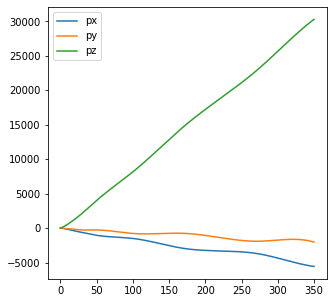

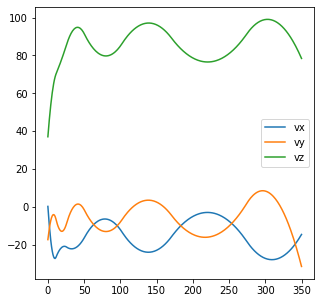

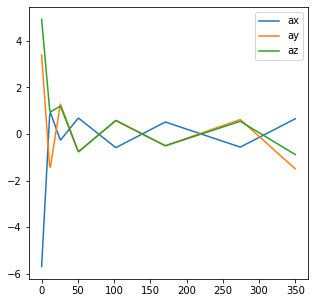

In [136]:
# posicion
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p_data)), p_data )
plt.legend(['px','py','pz'])
plt.show()

# velocidad
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v_data)), v_data )
plt.legend(['vx','vy','vz'])
plt.show()

# aceleracion
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a_data)), a_data)
plt.legend(['ax','ay','az'])
plt.show()


In [137]:


def kalmanFilter(measurements, x_prediction, z_prediction, P_prediction, innovations, x_estimations, P_estimation):

  # initialization
  x=x0
  P=P0
  n=F.shape[1]

  for z in measurements:
      # predict next state
      x = np.dot(F, x) 
      P = np.dot(np.dot(F, P), F.T) + Q 
      
      # xn,n-1
      x_prediction.append(x)
      # yn,n-1
      z_prediction.append(np.dot(H, x))
      #Pn,n-1 trace
      P_prediction.append(np.trace(P))

      # Kalman gain 
      S = R + np.dot(H, np.dot(P, H.T)) # covarianza de la innovacion
      K = np.dot(np.dot(P, H.T), np.linalg.inv(S)) 
      
      # State update (estimate current state)
      innovation_n = z - np.dot(H, x)
      innovations.append(innovation_n)
      x = x + np.dot(K,  z - np.dot(H, x)) 
      
      #xn,n y zn,n
      x_estimations.append(x)

      #covarianza update
      I = np.identity(n)
      P = np.dot(np.dot(I - np.dot(K, H), P), 
                (I - np.dot(K, H)).T) + np.dot(np.dot(K, R), K.T) 
      #Pn,n
      P_estimation.append(np.trace(P))


## PRIMER CASO:

1) Se mide la posicion afectada por ruido blanco (gaussiano) de 10m de desvio estandar.
Es decir que se le debe agregar ruido blanco con una distribucion gaussiana con
media cero y desvio 10.

In [138]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))

In [139]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [140]:

P_estimation = [] # Pn,n
P_prediction = [] # Pn,n-1 or Pn+1,n

x_estimations = [] # xn,n
x_prediction = [] # xn,n-1 or xn+1,n
z_prediction = [] # yn,n-1 or yn+1,n

innovations = [] # (zn - zn,n-1) or (yk - yk,k-1) or  (zn - Hxn,n-1)


kalmanFilter(p_measurements, x_prediction, z_prediction, P_prediction, innovations, x_estimations, P_estimation)

x_e = np.array(x_estimations)
x_predict = np.array(x_prediction)
z_predict = np.array(z_prediction)
innovations = np.array(innovations)
P_trace_e = np.array(P_estimation)
P_trace_predict = np.array(P_prediction)




## Grafica Innovaciones 
Error en la prediccion de las mediciones

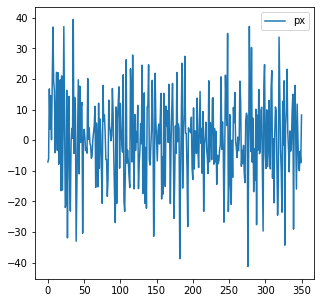

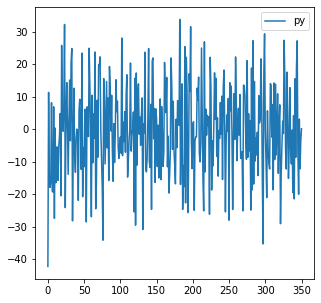

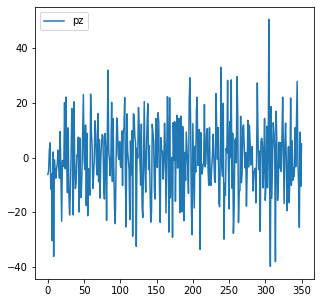

In [141]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

## Media de la innovaciones

In [142]:
np.mean(innovations, axis=0)


array([ 0.47846789, -0.57398734, -0.49506728])

In [143]:
np.std(innovations, axis=0)

array([13.89362853, 14.16955752, 13.67501774])

Obs: media es aproximadamente 0 y con una varianza alrededor de 15m (el devio estandar de las mediciones es 10m). El filtro kalman predice bien la posicion.

## Graficas Estimacion, prediccion vs Datos Reales

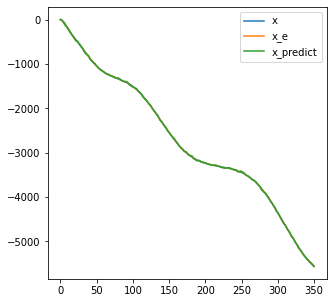

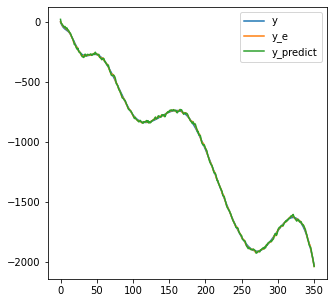

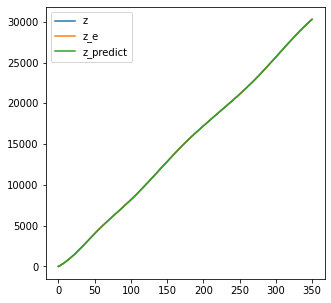

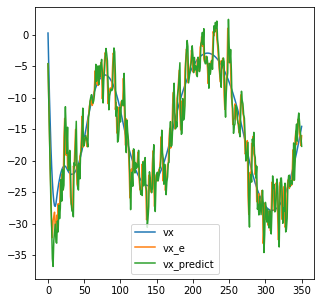

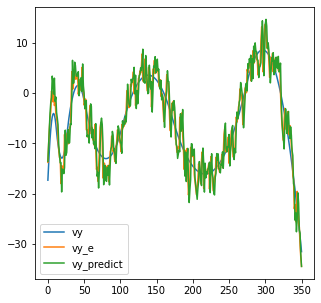

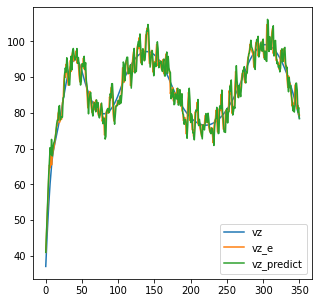

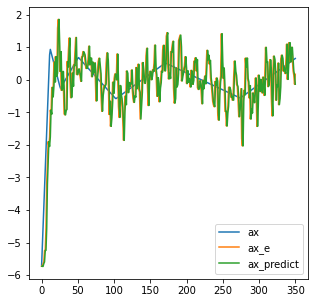

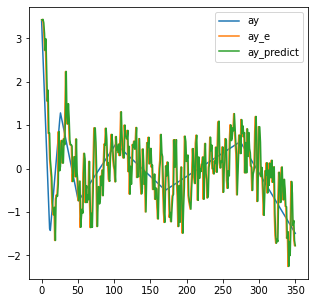

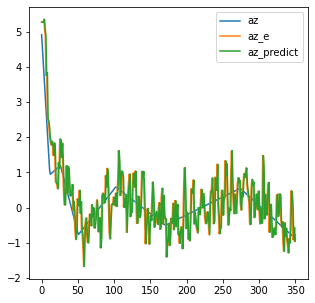

In [144]:
#posicion
p = p_data
p_e = x_e[:,0:3]
p_predict = x_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x', 'x_e', 'x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_e', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_e', 'z_predict'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
v_predict = x_predict[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.plot(range(len(v_predict)), v_predict[:,0])
plt.legend(['vx', "vx_e", 'vx_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.plot(range(len(v_predict)), v_predict[:,1])
plt.legend(['vy', "vy_e", 'vy_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.plot(range(len(v_predict)), v_predict[:,2])
plt.legend(['vz', "vz_e", 'vz_predict'])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]
a_predict = x_predict[:,6:9]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.plot(range(len(a_predict)), a_predict[:,0])
plt.legend(['ax', "ax_e", 'ax_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.plot(range(len(a_predict)), a_predict[:,1])
plt.legend(['ay', "ay_e", 'ay_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.plot(range(len(a_predict)), a_predict[:,2])
plt.legend(['az', "az_e", 'az_predict'])
plt.show()

Obs: Hay buena estimacion de la posicion, pero no de la velocidad y aceleracion (No hay mediciones de velocidad y aceleracion para poder ajustar mejor)

## Grafica Prediccion vs datos reales

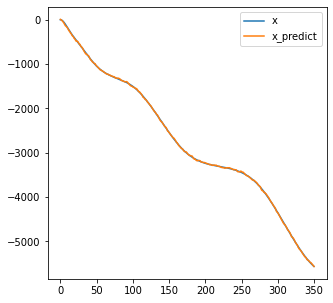

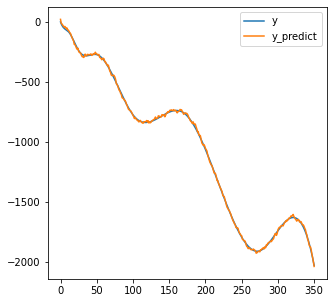

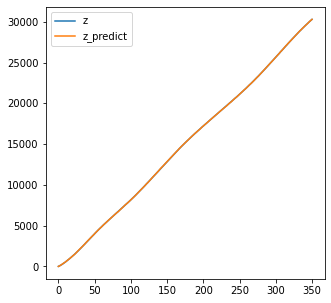

In [145]:
#posicion
p = p_data
p_predict = z_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x','x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_predict'])
plt.show()


## Trazas de matrices P, estimacion y prediccion

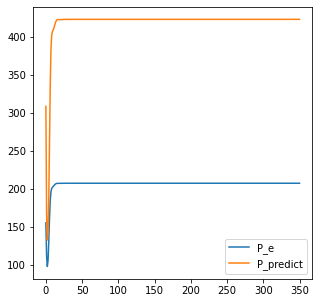

In [146]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(P_trace_e)), P_trace_e)
plt.plot(range(len(P_trace_predict)), P_trace_predict)

plt.legend(["P_e", "P_predict"])
plt.show()

In [147]:
P_trace_e[-1]

207.78234885468

In [148]:
P_trace_predict[-1]

423.1078954142455

Obs: La matrix de incertidumbre de la estimacion de estado tiene un valor alto, en la grafica se grafica la traza (suma de varianzas de posicion,velocidad y aceleracion). Considerando que la varianza de medicion de posicion = 100, la traza es mucho mayor. Lo que indica que no hay buena estimacion del estado.

## SEGUNDO CASO:

2) Se mide la posicion afectada por ruido blanco (uniforme) de 10m de desvio estandar.
Similar al item anterior. La idea es comparar con el item anterior. Analizar si hubo
algun cambio.

In [149]:
p_measurements = p_data + np.random.uniform(-10*math.sqrt(3), 10*math.sqrt(3), (len(p_data), 3))

In [150]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0]])

R = 100*np.identity(3)

In [151]:
P_estimation = [] # Pn,n
P_prediction = [] # Pn,n-1 or Pn+1,n

x_estimations = [] # xn,n
x_prediction = [] # xn,n-1 or xn+1,n
z_prediction = [] # yn,n-1 or yn+1,n

innovations = [] # (zn - zn,n-1) or (yk - yk,k-1) or  (zn - Hxn,n-1)


kalmanFilter(p_measurements, x_prediction, z_prediction, P_prediction, innovations, x_estimations, P_estimation)

x_e = np.array(x_estimations)
x_predict = np.array(x_prediction)
z_predict = np.array(z_prediction)
innovations = np.array(innovations)
P_trace_e = np.array(P_estimation)
P_trace_predict = np.array(P_prediction)

## Grafica Innovaciones
Error en la prediccion de las mediciones

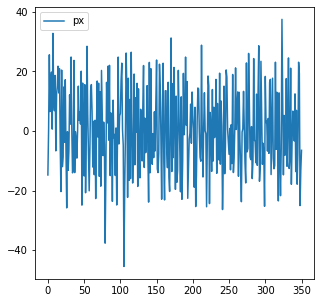

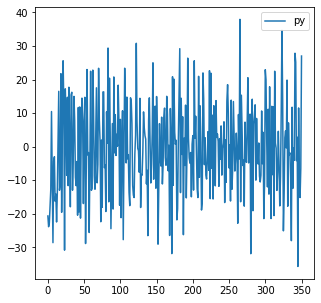

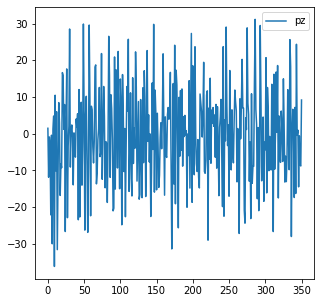

In [152]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

## Media de la innovaciones

In [153]:
np.mean(innovations, axis=0)

array([ 0.47522894, -0.58384257, -0.5550352 ])

In [154]:
np.std(innovations, axis=0)

array([14.48767135, 13.90215221, 13.34020875])

Obs: El resultado es muy similar al caso 1), el desvio estandar de las mediciones es 10m. La prediccion de la posicion es relativamente buena.

## Graficas Estimacion, prediccion vs Datos Reales



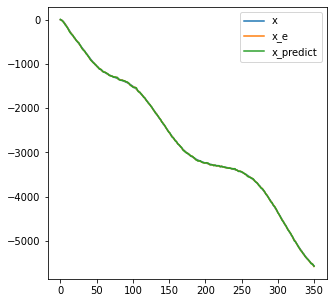

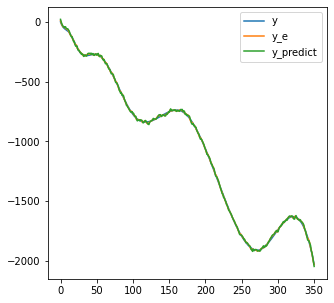

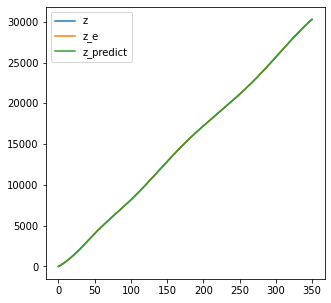

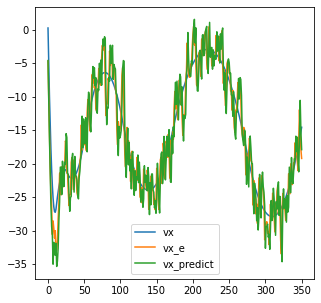

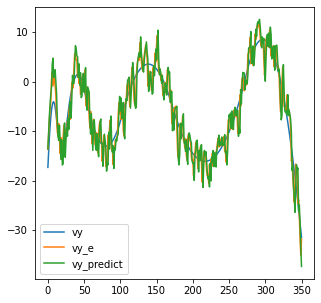

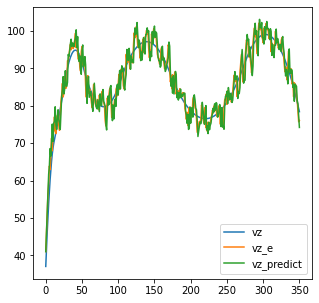

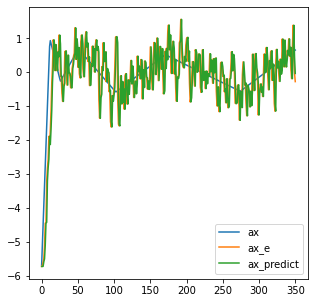

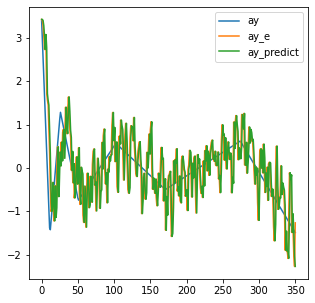

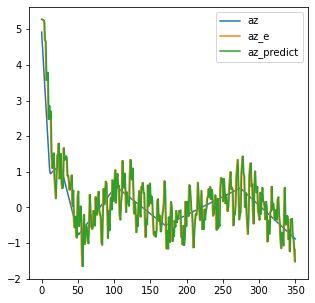

In [155]:
#posicion
p = p_data
p_e = x_e[:,0:3]
p_predict = x_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x', 'x_e', 'x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_e', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_e', 'z_predict'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
v_predict = x_predict[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.plot(range(len(v_predict)), v_predict[:,0])
plt.legend(['vx', "vx_e", 'vx_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.plot(range(len(v_predict)), v_predict[:,1])
plt.legend(['vy', "vy_e", 'vy_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.plot(range(len(v_predict)), v_predict[:,2])
plt.legend(['vz', "vz_e", 'vz_predict'])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]
a_predict = x_predict[:,6:9]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.plot(range(len(a_predict)), a_predict[:,0])
plt.legend(['ax', "ax_e", 'ax_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.plot(range(len(a_predict)), a_predict[:,1])
plt.legend(['ay', "ay_e", 'ay_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.plot(range(len(a_predict)), a_predict[:,2])
plt.legend(['az', "az_e", 'az_predict'])
plt.show()

## Grafica Prediccion vs datos reales

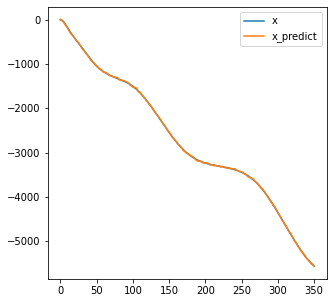

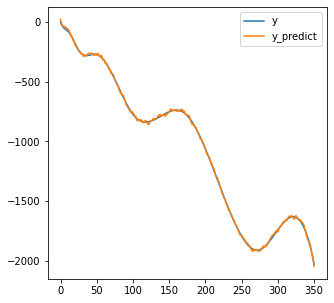

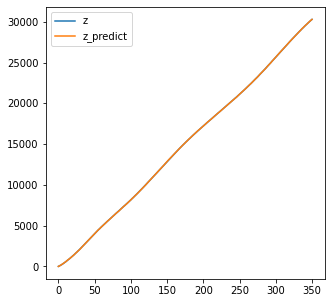

In [156]:
#posicion
p = p_data
p_predict = z_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x','x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_predict'])
plt.show()

## Trazas de matrices P, estimacion y prediccion

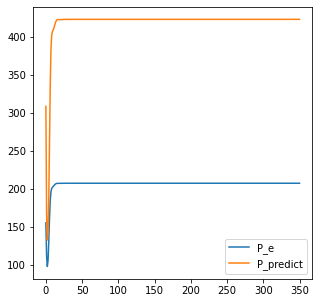

In [157]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(P_trace_e)), P_trace_e)
plt.plot(range(len(P_trace_predict)), P_trace_predict)

plt.legend(["P_e", "P_predict"])
plt.show()

In [158]:
P_trace_e[-1]

207.78234885468

In [159]:
P_trace_predict[-1]

423.1078954142455

Obs: Se pueden ver resultados de estimacion de estado similares, son muy altos todavia

## TERCER CASO:

3) Se mide la posicion y la velocidad afectadas por ruido blanco (gaussiano) de 10m
y 0.2m/s de desvios respectivamente. Analizar si mejora la estimacion

In [160]:
p_measurements = p_data + np.random.normal(0, 10, (len(p_data), 3))
v_measurements = v_data + np.random.normal(0, 0.2, (len(v_data), 3))
pv_measurements = np.concatenate((p_measurements, v_measurements), axis=1)

In [161]:
dt = 1  ## 1 seconds
h = dt
x0 = np.array([10.7533, 36.6777, -45.1769, 1.1009, -17.0, 35.7418, -5.7247, 3.4268, 5.2774])
P0 = np.diag([100, 100, 100, 1, 1, 1, 0.01, 0.01, 0.01])
Q = 0.3*np.identity(9)


F = np.array([[1, 0, 0, h, 0, 0, h**2/2, 0, 0], 
              [0, 1, 0, 0, h, 0, 0, h**2/2, 0], 
              [0, 0, 1, 0, 0, h, 0, 0, h**2/2],
              [0, 0, 0, 1, 0, 0, h, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, h, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, h],
              [0, 0, 0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 0, 0, 0, 0, 0, 1]])

H = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0], 
              [0, 1, 0, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0, 0, 0], 
              [0, 0, 0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0, 0, 0]])

R = np.array([[100, 0, 0, 0, 0, 0], 
              [0, 100, 0, 0, 0, 0],
              [0, 0, 100, 0, 0, 0],
              [0, 0, 0, 0.04, 0, 0],
              [0, 0, 0, 0, 0.04, 0],
              [0, 0, 0, 0, 0, 0.04]])



In [162]:
P_estimation = [] # Pn,n
P_prediction = [] # Pn,n-1 or Pn+1,n

x_estimations = [] # xn,n
x_prediction = [] # xn,n-1 or xn+1,n
z_prediction = [] # yn,n-1 or yn+1,n

innovations = [] # (zn - zn,n-1) or (yk - yk,k-1) or  (zn - Hxn,n-1)


kalmanFilter(pv_measurements, x_prediction, z_prediction, P_prediction, innovations, x_estimations, P_estimation)

x_e = np.array(x_estimations)
x_predict = np.array(x_prediction)
z_predict = np.array(z_prediction)
innovations = np.array(innovations)
P_trace_e = np.array(P_estimation)
P_trace_predict = np.array(P_prediction)

## Grafica Innovaciones
Error en la estimacion de las mediciones

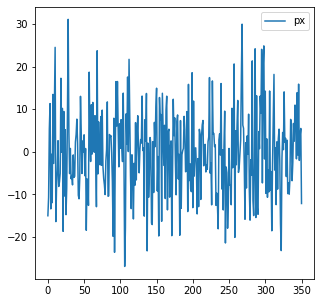

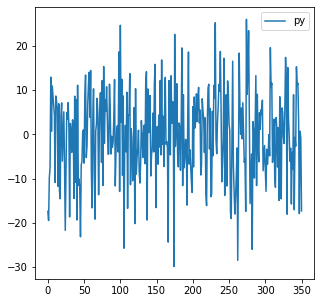

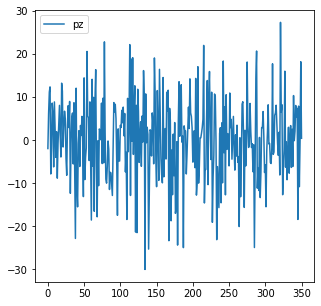

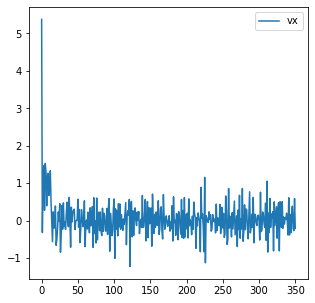

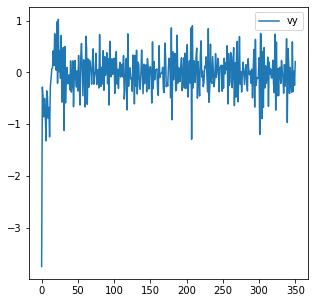

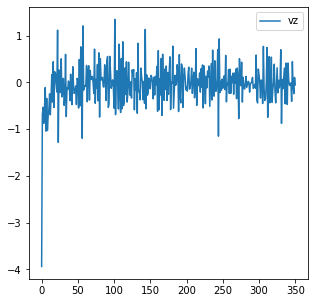

In [163]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,0])
plt.legend(['px'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,1])
plt.legend(['py'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,2])
plt.legend(['pz'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,3])
plt.legend(['vx'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,4])
plt.legend(['vy'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(innovations)), innovations[:,5])
plt.legend(['vz'])
plt.show()

## Media de la innovaciones

In [164]:
np.mean(innovations, axis=0)

array([-0.34756503, -0.34880092, -0.1086488 ,  0.0478199 , -0.03463197,
       -0.04186246])

In [165]:
np.std(innovations, axis=0)

array([10.19218185, 10.18604392,  9.60384831,  0.51077193,  0.44081778,
        0.45000622])

Obs: La media de la prediccion se aproxima mejor a 0 y los desvios estandar tambien son mas aceptables 

## Graficas Estimacion, prediccion vs Datos Reales


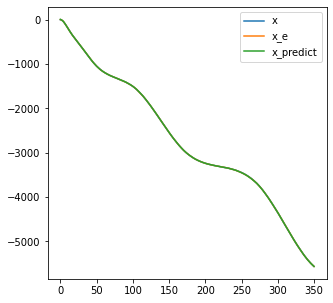

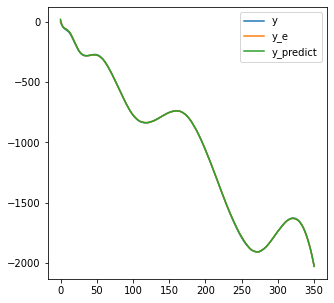

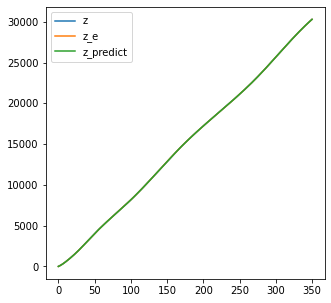

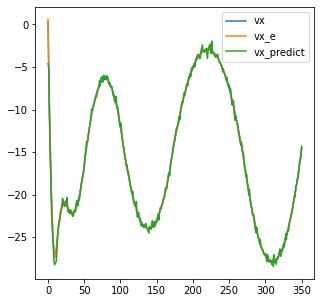

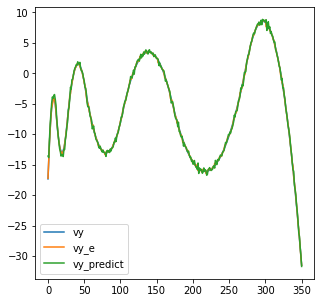

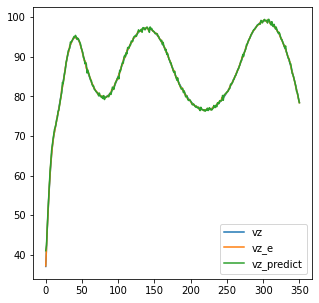

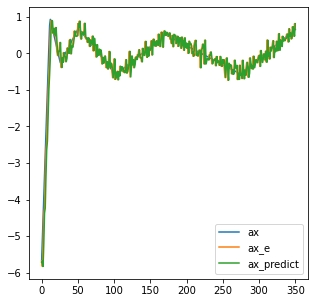

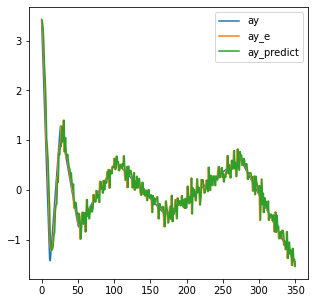

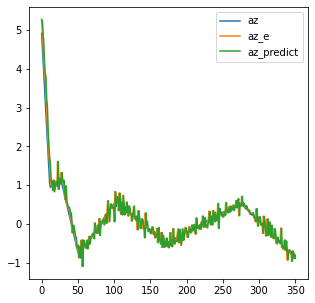

In [166]:
#posicion
p = p_data
p_e = x_e[:,0:3]
p_predict = x_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_e)), p_e[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x', 'x_e', 'x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_e)), p_e[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_e', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_e)), p_e[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_e', 'z_predict'])
plt.show()

#velocidad
v = v_data
v_e = x_e[:,3:6]
v_predict = x_predict[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_e)), v_e[:,0])
plt.plot(range(len(v_predict)), v_predict[:,0])
plt.legend(['vx', "vx_e", 'vx_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_e)), v_e[:,1])
plt.plot(range(len(v_predict)), v_predict[:,1])
plt.legend(['vy', "vy_e", 'vy_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_e)), v_e[:,2])
plt.plot(range(len(v_predict)), v_predict[:,2])
plt.legend(['vz', "vz_e", 'vz_predict'])
plt.show()


#aceleracion
a = a_data
a_e = x_e[:,6:9]
a_predict = x_predict[:,6:9]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,0])
plt.plot(range(len(a_e)), a_e[:,0])
plt.plot(range(len(a_predict)), a_predict[:,0])
plt.legend(['ax', "ax_e", 'ax_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,1])
plt.plot(range(len(a_e)), a_e[:,1])
plt.plot(range(len(a_predict)), a_predict[:,1])
plt.legend(['ay', "ay_e", 'ay_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(a)), a[:,2])
plt.plot(range(len(a_e)), a_e[:,2])
plt.plot(range(len(a_predict)), a_predict[:,2])
plt.legend(['az', "az_e", 'az_predict'])
plt.show()

Obs: La estimacion de la velocidad mejora bastante (se tienen mediciones de velocidad), la aceleracion tambien mejora aunque aun presenta ruido. 

## Grafica Prediccion vs datos reales

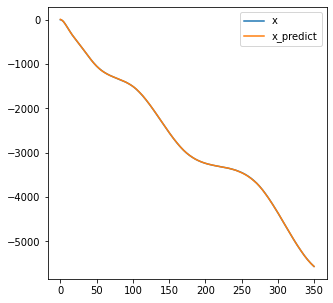

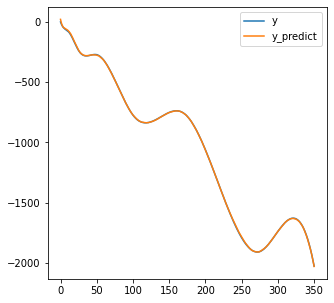

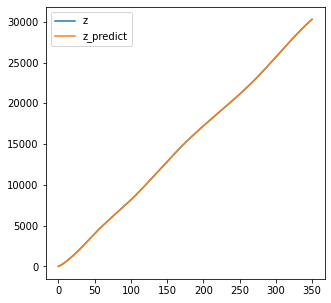

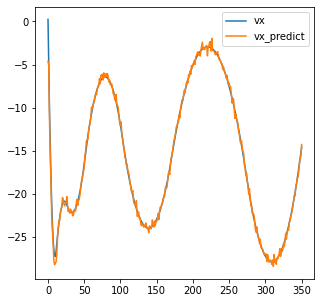

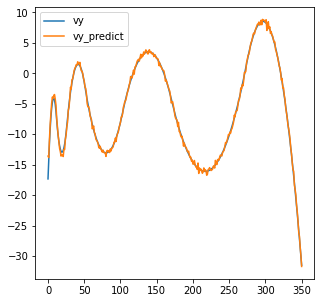

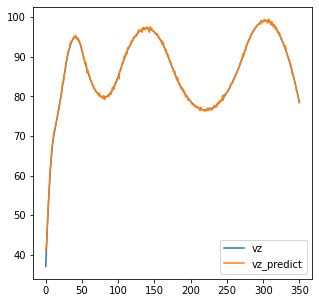

In [167]:
#posicion
p = p_data
p_predict = z_predict[:,0:3]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,0])
plt.plot(range(len(p_predict)), p_predict[:,0])
plt.legend(['x','x_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,1])
plt.plot(range(len(p_predict)), p_predict[:,1])
plt.legend(['y', 'y_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(p)), p[:,2])
plt.plot(range(len(p_predict)), p_predict[:,2])
plt.legend(['z', 'z_predict'])
plt.show()


#posicion
v = v_data
v_predict = x_predict[:,3:6]
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,0])
plt.plot(range(len(v_predict)), v_predict[:,0])
plt.legend(['vx','vx_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,1])
plt.plot(range(len(v_predict)), v_predict[:,1])
plt.legend(['vy', 'vy_predict'])
plt.show()

plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(v)), v[:,2])
plt.plot(range(len(v_predict)), v_predict[:,2])
plt.legend(['vz', 'vz_predict'])
plt.show()

## Trazas de matrices P, estimacion y prediccion

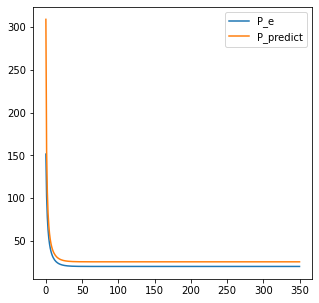

In [168]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.plot(range(len(P_trace_e)), P_trace_e)
plt.plot(range(len(P_trace_predict)), P_trace_predict)

plt.legend(["P_e", "P_predict"])
plt.show()

In [169]:
P_trace_e[-1]

20.31076498294321

In [170]:
P_trace_predict[-1]

25.71480570637

Obs: La matrix de incertidumbre de la estimacion de estado tiene un valor bajo comparador al punto 1) y 2), se puede decir que el filtro kalman predice mucho mejor el estado del sistema. 

## Conclusiones:

* En el punto 1) y 2) se estima muy bien la posicion debido a que se tienen mediciones de posicion. La estimacion de velocidad y aceleracion siguen la tendencia pero con mucho ruido.
* En 3) se estima correctamente la velocidad debido a que en la estimacion se toma en cuenta mediciones de velocidad. La estimacion de la aceleracion tambien mejora considerablemente.
